# Course : Python Machine learning Lab's. 

# Project : Book's average rating prediction

Made by :                                                                                                                        
Amanda Nicole ENGOLE                                                                                                                
Freedel ZINSOU-PLY                                                                                                                 
Ngutor Emmanuel CHAGBE                                                                                                               
Yann M'POUE

The objective of this project is to predict the book's rating thanks to the different variables of our database.
We followed several steps to reach this goal.

### Data cleaning  
In a first step we cleaned the data:

-Checking of null values

-Checking the dates that do not respect the correct format or that have outliers 

-Checking of numeric fields that have alphabetic fields  

### Feature selection :                                                                                                              
Once our database is clean we proceed to the selection of our variables.                                                          
We then created other variables from existing variables, while justifying and conducting a logical reasoning

### Data explanatory:                                                                                                                
Our data being clean and our variables selected, we have therefore proceeded to the exploitation of our data through descriptive statistics thanks to tables and graphs. This part allowed us to deepen our knowledge about the data and to prepare how we could
predict the variable of interest.

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [173]:
#Importation of data base
data = pd.read_csv(r"C:\Users\33758\Downloads\books - books.csv",sep=';')
df = pd.read_csv("C:/Users/33758/Downloads/books.csv",sep=",",index_col="bookID")

In [ ]:
data = pd.read_csv("C:/Users/33758/Downloads/books.csv", error_bad_lines=False)

### Data Cleaning 

In [196]:
# type checks for variables 
data.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [197]:
# check null_values()
data.isnull().any()
#We don't have any missing values 

bookID                False
title                 False
authors               False
average_rating        False
isbn                  False
isbn13                False
language_code         False
  num_pages           False
ratings_count         False
text_reviews_count    False
publication_date      False
publisher             False
dtype: bool

In [201]:
#check duplicate rows 
data[data.duplicated()]
#we got none duplicate row which is good

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


In [204]:
###check if we have any errors in the dates. Example: a month that exceeds 12?a day that exceeds 31

In [233]:
# We noticed that somes books are not books, thoses books have theirs authors as : "NOT A BOOK" and there are 5.
# We will remove them because we try to predict books
len(data[data['authors']=='NOT A BOOK'])

5

In summary we have no null value, no duplicate line and we have 5 books that are NOT BOOKS (the authors is NOT A BOOK) and as we can see the num_pages is less than 30. We will not use them in our prediction because we are predicting the rating of the books 
So we will remove them to make our prediction 

## Explonatory data

In [270]:
#Let's see who have written the most 

C:\Users\33758\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


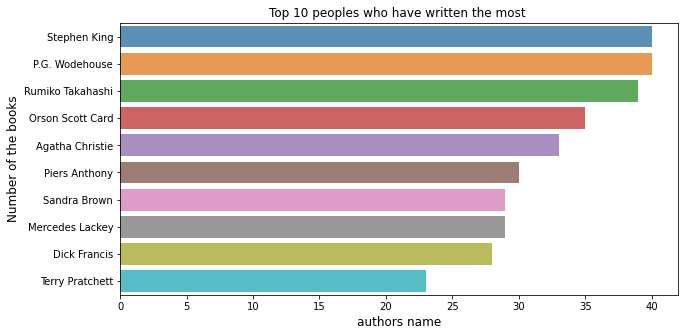

In [362]:
city_count  = data['authors'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.values, city_count.index, alpha=0.8)
plt.title('Top 10 peoples who have written the most ')
plt.ylabel('Number of the books', fontsize=12)
plt.xlabel('authors name', fontsize=12)
plt.show()

In [392]:
#Let's see the average age of publication of books
data['publication_year']=data.apply(lambda x: x['publication_date'][-4:], axis=1) #First , we will create a columns publication_year
data['publication_year'] = pd.to_numeric(df['publication_year'])
data['book_age']=data.publication_year.apply(lambda x: x if x < 1 else 2023-x) # Then we Create Book age column using published year

22.830980850489976

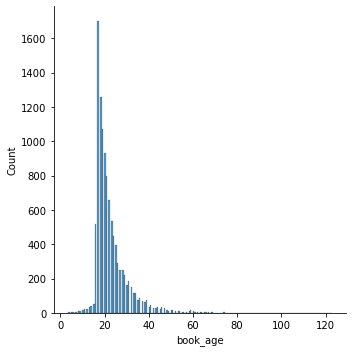

In [395]:
sns.displot(data.book_age) 

In [397]:
data['book_age'].mean()

22.830980850489976

In [ ]:
#The publication age of books is 23 years old

C:\Users\33758\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


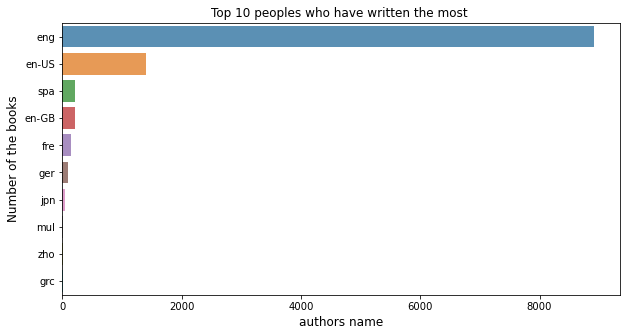

In [366]:
#Let's see in which language the books have been registered the most
languages_code_occurence = data['language_code'].value_counts()
languages_code_occurence = languages_code_occurence[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.values, city_count.index, alpha=0.8)
plt.title('Top 10 peoples who have written the most ')
plt.ylabel('Number of the books', fontsize=12)
plt.xlabel('authors name', fontsize=12)
plt.show()

In [376]:
#Let's see which authors write most successful books
#Assume that a books is very successful when it has a rating between (4.5 and 5), 
#so first lets take all information about books that got average rating between 4 and 5
# and then lets see  Who has written the most best sellers
books_succesful=data[(data["average_rating"]> 4) & (data["average_rating"]<5)]

C:\Users\33758\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


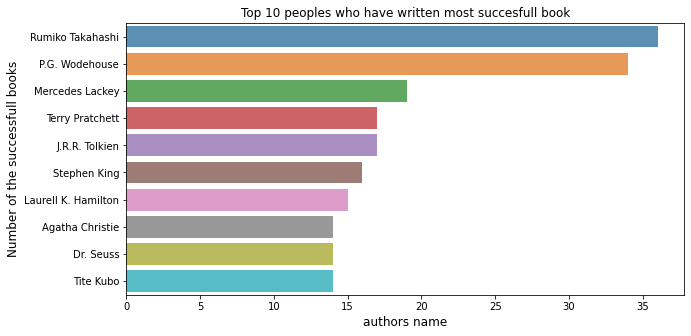

In [377]:
best_seller = books_succesful['authors'].value_counts()
best_seller= best_seller[:10,]
plt.figure(figsize=(10,5))
sns.barplot(best_seller.values, best_seller.index, alpha=0.8)
plt.title('Top 10 peoples who have written most succesfull book')
plt.ylabel('Number of the successfull books', fontsize=12)
plt.xlabel('authors name', fontsize=12)
plt.show()

In [25]:
#We notice that among the top 10 people who wrote good books, we find the 4 people who wrote the most books like
#Rumiko Takahashi, PG Wodehouse, Agatha Christie, Stephen King who are in the top 5 of people who have written the most good books.
#So we can deduce that these authors have not only written a lot of books but have written at least more than 10 successful books.
#They are therefore very good authors 

In [ ]:
#Let's calculate the bestseller rate. The bestseller rate is the number of bestsellers written/number of books written

In [ ]:
#Who is the best author?
#I define by the best author the one who has the proportion of very good book written compared to the number of book written
#A very good book being a book with an average rating in [4.5,5].

In [382]:
#This algorithm allows to put in three lists respectively nb_books,nb_best_books,perc_best_books the total number of books written
#by an author, the total number of best books written by the author and finally the proportion of best book written by the author
nb_books =[]
nb_best_books=[]
perc_best_book=[]
for i in authors :
    b=data[data["authors"]==i] 
    b1=len(b[(b['average_rating']>=4.5) & (b['average_rating']<=5)])
    b2=len(b)
    b3=(b1/b2)*100
    nb_books.append(b2)
    nb_best_books.append(b1)
    perc_best_book.append(b3)

In [387]:
#Once the data is put into lists, a database is built to allow all the information to be put together
BS=pd.DataFrame(np.column_stack([authors,nb_books,nb_best_books, perc_best_book]),columns=["authors","nb_books","nb_best_books", "perc_best_book"])

In [389]:
#I sort my database by the varibal (perc_best_book) i.e. the proportion of books to the number of books 
BS=BS.sort_values(by=["perc_best_book"],ascending=False)

In [390]:
#I look at who are the ones with a perc_best_book >=50%. Authors who have a perc_best_book >=50% ar
BS[BS["perc_best_book"]>=50]

,authors,nb_books,nb_best_books,perc_best_book
1243,Middlesex Borough Heritage Committee,1,1,100.0
6589,Bill Watterson,7,7,100.0
7512,J.R.R. Tolkien/Rob Inglis,2,2,100.0
145,Ralph Ginzburg,1,1,100.0
3825,Mikhail Tal/Hanon W. Russell,1,1,100.0
...,...,...,...,...
8714,Ian Edginton/Simon Fraser,2,1,50.0
6198,David R. Hawkins,4,2,50.0
626,Raymond Chandler/Frank MacShane,2,1,50.0
1531,Don Rosa,2,1,50.0


In [ ]:
#We have 230 authors with more than half of their books being bestsellers

In [ ]:
#Voyons les valeurs  numériques corrélés à notre variable d'intêret

In [412]:
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,book_age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,17
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,19
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,2003,20
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,19
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2004,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,2004,19
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,1988,35
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,1993,30
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,2007,16


In [413]:
df = data[["average_rating","isbn13","ratings_count","book_age","text_reviews_count"]]

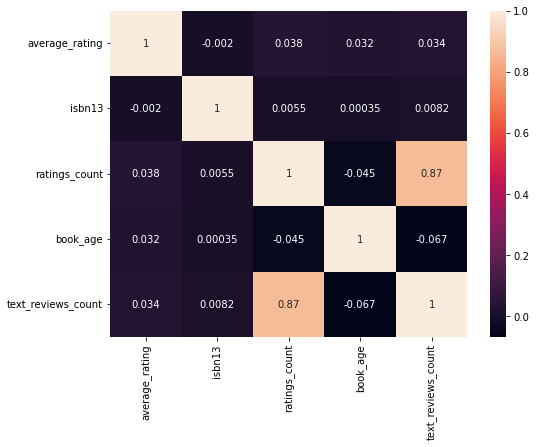

In [414]:
corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#As we can see the variables rating_counts , book_age, text_reviews_count are positively related to our variable of interest even if it is weakly.
#On the other hand the variable ISBN is negatively related to the variable of interest.

# Feature selection

In [428]:
#We create a variable language_code_2 because , we will hotencoding the variable language_code but before we want to reduce the size of the mosalities of that variable
#creation of the variable
def language(series):
    if series == 'eng' or series=='en-US' or series=='en-GB' or series =="en-CA":
        return 'eng'
    else:
        return series

data['language_code_2'] = data['language_code'].apply(language)
        
data['language_code_2'].value_counts()
#Onehotencoding the variable
dummy=pd.get_dummies(data['language_code_2'])
data=pd.concat([data,dummy],axis=1)

### Prédictions